In [2]:
import pandas as pd
import sqlite3
import numpy as np

# Bloody Roar Tier List

Bloody Roar es un juego de peleas 3D Relativamente equilibrado, sin embargo las mecanicas implementadas e el juego y la cantidad de herramientas que le ofrece al jugador, puede lograr equilibrar el juego, basicamente la tasa de victorias depende de habilidad del jugador y de su creatividad para salir de diferentes situaciones.

Algo a notar es que el daño generado por un personaje es algo aleatorio, algunas veces depende de si el golpe dado fue a la espalda del contrincante o por un contraataque,
esto puede distorcionar claramente el resultado de descubrir fielmente la lista del mejor peleador al peor.

La prueba fue hecha ejecutando peleas CPU vs CPU, con el máximo de rounds 4, con máximo daño 8 y con el maximo nivel de dificultad 8, aunque el juego tiene varios niveles de dificultad de CPU, basicamente tiene 2, una version tonta y una version experta, en Arcade esto se hace mas evidente cuando pierdes una pelea contra un personaje de la CPU bastante dificil, automaticamente continuas con la revancha, aparece la CPU tonta, del mismo modo pero de manera aleatoria aparece la CPU tonta, lo que tambien afecta el descubrimiento de la Tier List, porque la CPU no está demostrando sus capacidades al 100%

In [4]:
conn = sqlite3.connect('BR2TierList.db')
#query = 'SELECT Chars.char, Partidas.p1_rounds, Chars.char, Partidas.p2_rounds FROM Partidas JOIN Chars ON Partidas.p1_char = Chars.id OR Partidas.p2_char = Chars.id;'
query = '''
SELECT 
    p.id,
    c1.char AS p1_char,
    p.p1_rounds,
    c2.char AS p2_char,
    p.p2_rounds
FROM Partidas p
INNER JOIN Chars c1 ON p.p1_char = c1.id
INNER JOIN Chars c2 ON p.p2_char = c2.id
'''

df = pd.read_sql_query(query, conn)
df.set_index('id', inplace=True)
conn.close()
df

,p1_char,p1_rounds,p2_char,p2_rounds
id,,,,
1,Yugo,2,Stun,4
2,Yugo,4,Stun,2
3,Yugo,1,Stun,4
4,Yugo,4,Stun,2
5,Yugo,4,Stun,3
...,...,...,...,...
1096,Shen Long,3,Gado,4
1097,Shen Long,4,Gado,2
1098,Shen Long,4,Gado,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 1 to 1100
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   p1_char    1100 non-null   object
 1   p1_rounds  1100 non-null   int64 
 2   p2_char    1100 non-null   object
 3   p2_rounds  1100 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.0+ KB


In [6]:
# Categorizar las columnas p1_char y p2_char con los nombres de los personajes
# 1 = Yugo, 2 = Kuro, 3 = Genji, 4 = Genio, 5 = Sombra, 6 = Luco, 7 = Zarya, 8 = Pharah, 9 = Reaper, 10 = Mei, 11 = Junkrat

# df['p1_char'] = df['p1_char'].replace({1: 'Yugo', 2: 'Stun', 3: 'Shina', 4: 'Bakuryu', 5: 'Long', 6: 'Alice', 7: 'Uriko', 8: 'Busuzima', 9: 'Jenny', 10: 'Gado', 11: 'Shen Long'})
# df['p2_char'] = df['p2_char'].replace({1: 'Yugo', 2: 'Stun', 3: 'Shina', 4: 'Bakuryu', 5: 'Long', 6: 'Alice', 7: 'Uriko', 8: 'Busuzima', 9: 'Jenny', 10: 'Gado', 11: 'Shen Long'})

df['p1_char'] = df['p1_char'].astype('category')
df['p2_char'] = df['p2_char'].astype('category')

In [8]:
df.info()

# Buscando los valores unicos de cada columna

df.p1_char.unique()
#df.p2_char.unique()
#df.p1_rounds.unique()
#df.p2_rounds.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 1 to 1050
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   p1_char    1050 non-null   category
 1   p1_rounds  1050 non-null   int64   
 2   p2_char    1050 non-null   category
 3   p2_rounds  1050 non-null   int64   
dtypes: category(2), int64(2)
memory usage: 27.4 KB


['Yugo', 'Stun', 'Shina', 'Bakuryu', 'Long', ..., 'Yuriko', 'Buzusima', 'Jenny', 'Gado', 'Shen Long']
Length: 11
Categories (11, object): ['Alice', 'Bakuryu', 'Buzusima', 'Gado', ..., 'Shina', 'Stun', 'Yugo', 'Yuriko']

In [7]:
# Agregan la columna de ganadores
df['p1_wins'] = df['p1_rounds'] == 4
df['p2_wins'] = df['p2_rounds'] == 4
df


,p1_char,p1_rounds,p2_char,p2_rounds,p1_wins,p2_wins
id,,,,,,
1,Yugo,2,Stun,4,False,True
2,Yugo,4,Stun,2,True,False
3,Yugo,1,Stun,4,False,True
4,Yugo,4,Stun,2,True,False
5,Yugo,4,Stun,3,True,False
...,...,...,...,...,...,...
1096,Shen Long,3,Gado,4,False,True
1097,Shen Long,4,Gado,2,True,False
1098,Shen Long,4,Gado,3,True,False


<AxesSubplot: title={'center': 'P1 vs P2'}, xlabel='p1_wins', ylabel='p2_wins'>

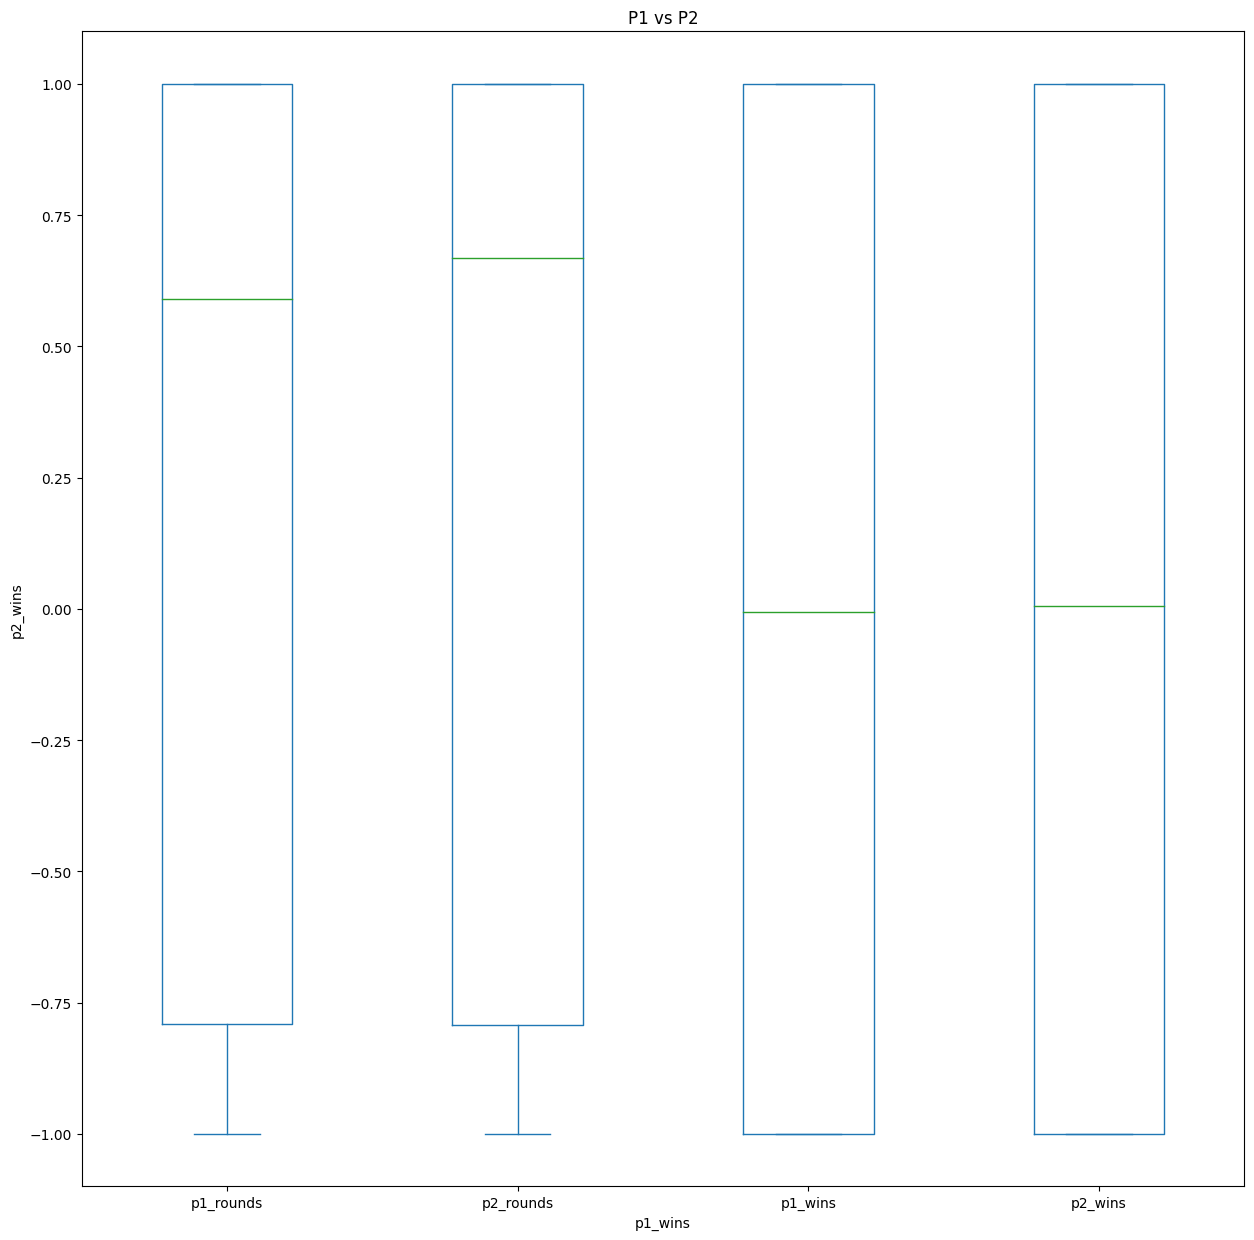

In [26]:
df.groupby(['p1_char', 'p2_char']).corr().plot.box(figsize=(15, 15), title='P1 vs P2', xlabel='p1_wins', ylabel='p2_wins')

<AxesSubplot: title={'center': 'P1 vs P2'}, xlabel='p1_char,p2_char', ylabel='p1_wins,p2_wins'>

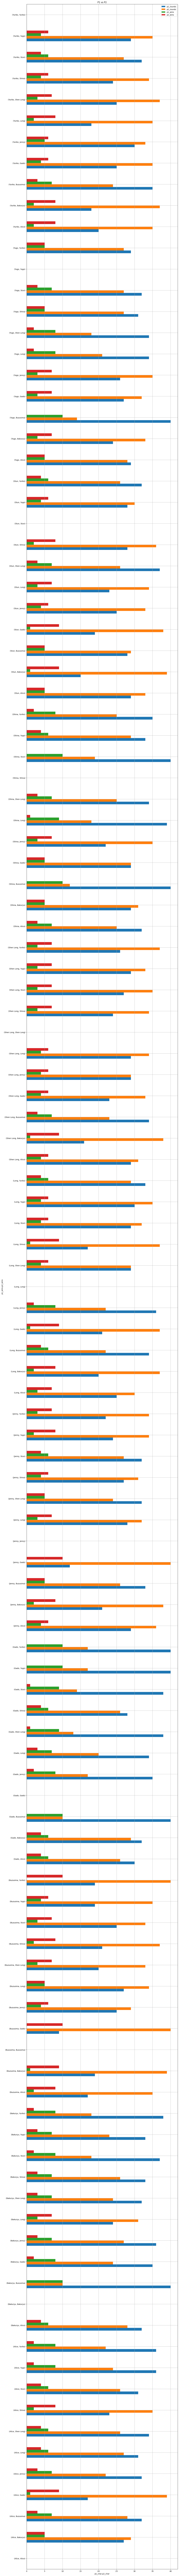

In [14]:
df.groupby(['p1_char', 'p2_char']).sum().plot.barh(figsize=(15, 256), 
                                                   title='P1 vs P2', 
                                                   xlabel='p1_char,p2_char', 
                                                   grid=True, 
                                                   ylabel='p1_wins,p2_wins')

/tmp/ipykernel_18366/3956377584.py:30: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


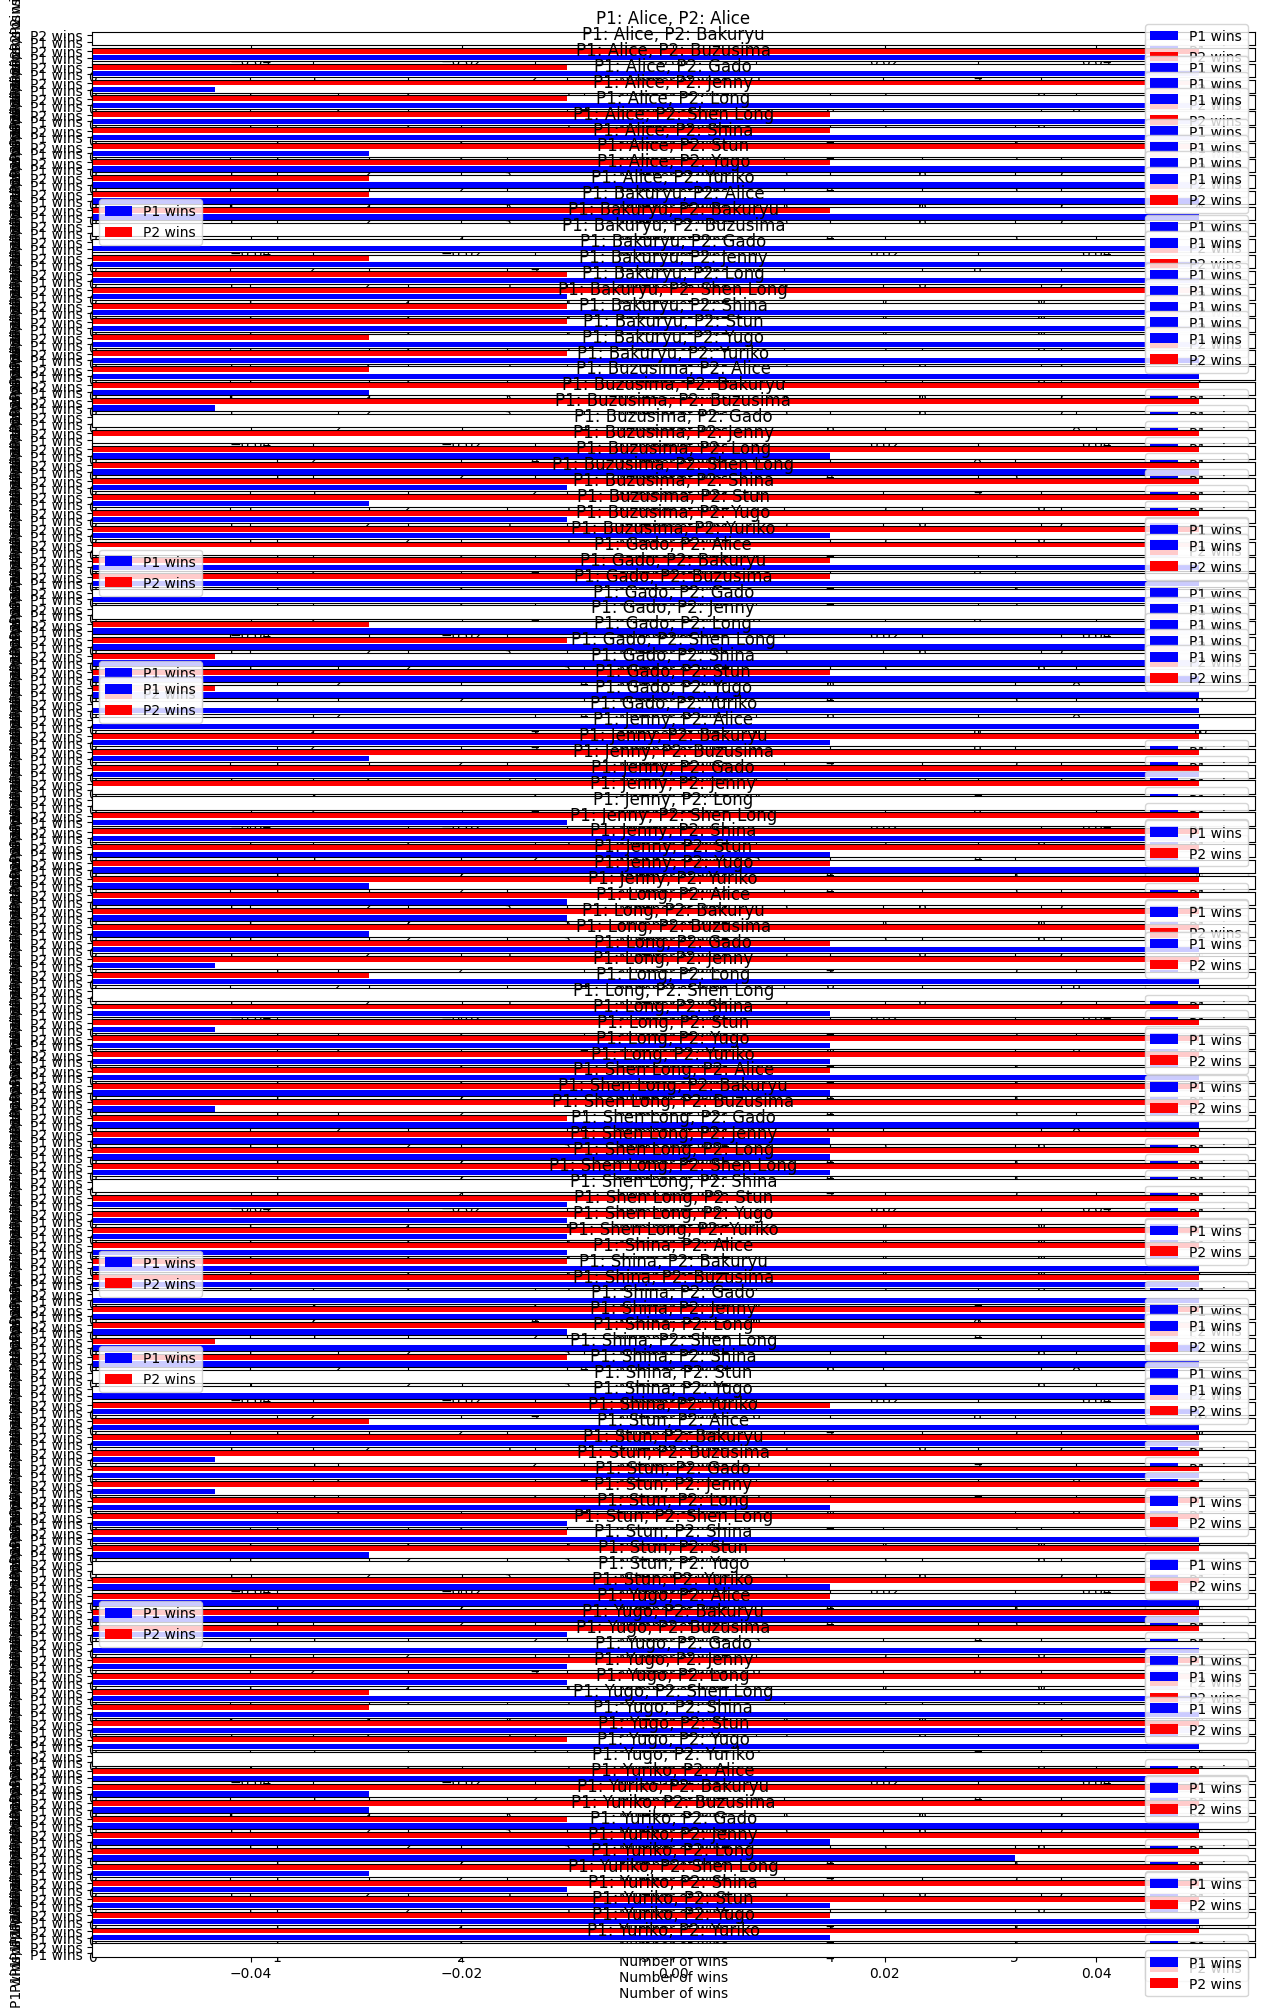

In [11]:
import matplotlib.pyplot as plt

# Obtener los datos agrupados
data = df.groupby(['p1_char', 'p2_char']).sum()

# Crear una cuadrícula de subplots
fig, axes = plt.subplots(nrows=len(data), ncols=1, figsize=(15, 25))

# Iterar sobre los datos agrupados y asignar cada barra a su propio subplot
for i, (index, row) in enumerate(data.iterrows()):
    p1_char, p2_char = index
    p1_wins, p2_wins = row['p1_wins'], row['p2_wins']

    # Configurar el título del subplot
    title = f'P1: {p1_char}, P2: {p2_char}'
    axes[i].set_title(title)

    # Crear las barras
    axes[i].barh(y='P1 wins', width=p1_wins, color='blue', label='P1 wins')
    axes[i].barh(y='P2 wins', width=p2_wins, color='red', label='P2 wins')

    # Configurar las etiquetas del eje x y y
    axes[i].set_xlabel('Number of wins')
    axes[i].set_ylabel('P1 wins, P2 wins')

    # Configurar la leyenda
    axes[i].legend()

# Ajustar la posición de las subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 1 to 900
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   p1_char    900 non-null    category
 1   p1_rounds  900 non-null    int64   
 2   p2_char    900 non-null    category
 3   p2_rounds  900 non-null    int64   
 4   p1_wins    900 non-null    bool    
 5   p2_wins    900 non-null    bool    
dtypes: bool(2), category(2), int64(2)
memory usage: 25.4 KB


<AxesSubplot: title={'center': 'P1 Rounds'}, xlabel='p1_char'>

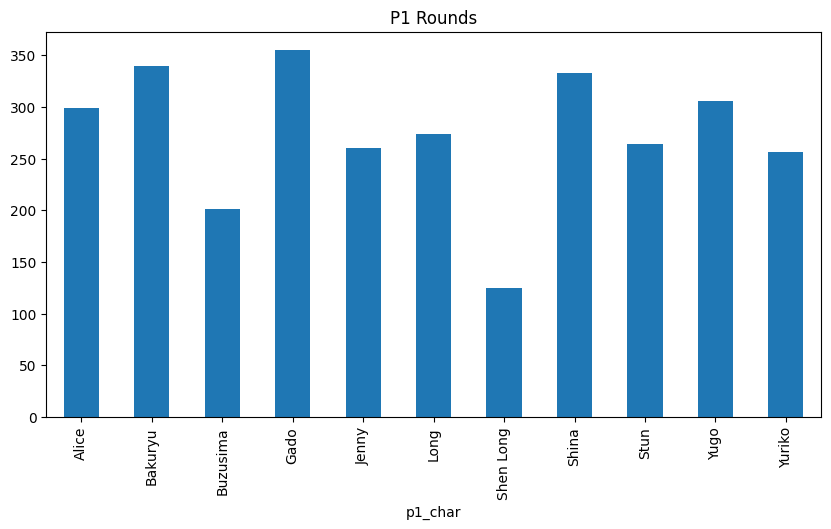

In [11]:
df.groupby('p1_char').p1_rounds.sum().plot(kind='bar', figsize=(10, 5), title='P1 Rounds')

In [14]:
df.groupby('p1_char').p1_rounds.sum()

p1_char
Alice       265
Bakuryu     308
Busuzima    181
Gado        317
Jenny       228
Long        245
Shina       299
Stun        227
Uriko       231
Yugo        272
Name: p1_rounds, dtype: int64

<AxesSubplot: title={'center': 'P2 Rounds'}, xlabel='p2_char'>

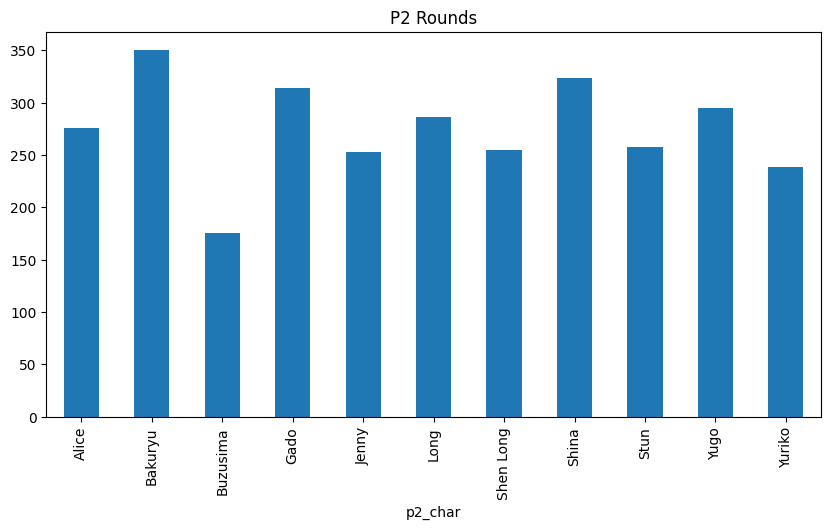

In [12]:
df.groupby('p2_char').p2_rounds.sum().plot(kind='bar', figsize=(10, 5), title='P2 Rounds')

In [13]:
df.groupby('p2_char').p2_rounds.sum()

p2_char
Alice        276
Bakuryu      350
Buzusima     175
Gado         314
Jenny        253
Long         286
Shen Long    255
Shina        323
Stun         258
Yugo         295
Yuriko       238
Name: p2_rounds, dtype: int64

<AxesSubplot: title={'center': 'P1 Wins'}, xlabel='p1_char'>

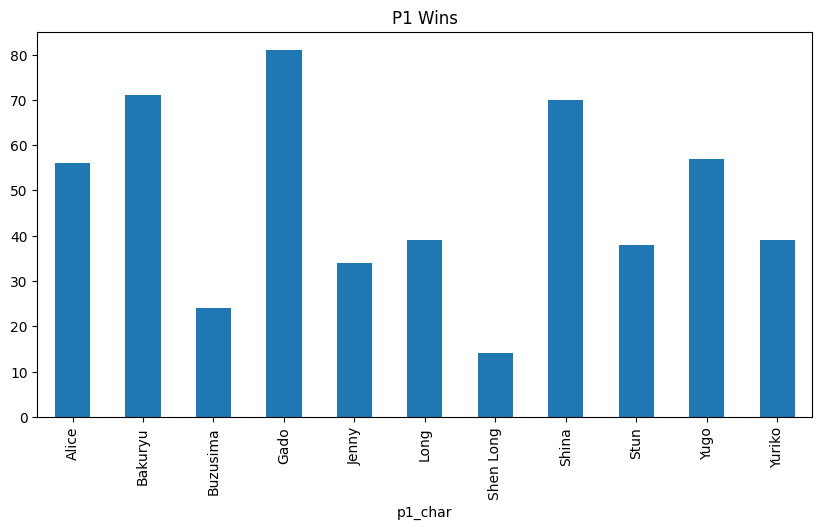

In [14]:
df.groupby('p1_char').p1_wins.sum().plot(kind='bar', figsize=(10, 5), title='P1 Wins')

In [15]:
df.groupby('p1_char').p1_wins.sum()

p1_char
Alice        56
Bakuryu      71
Buzusima     24
Gado         81
Jenny        34
Long         39
Shen Long    14
Shina        70
Stun         38
Yugo         57
Yuriko       39
Name: p1_wins, dtype: int64

### Lista de personajes.

1. Yugo
2. Stun
3. Shina
4. Bakuryu
5. Long
6. Alice
7. Yuriko
8. Buzusima
9. Yenny
10. Gado
11. Shen Long


In [16]:
yugo_mask = (df.p1_char == 'Yugo') & (df.p2_char == 'Stun')
yugo_df = df[yugo_mask]
yugo_df.groupby('p1_char').p1_rounds.sum()


p1_char
Alice         0
Bakuryu       0
Buzusima      0
Gado          0
Jenny         0
Long          0
Shen Long     0
Shina         0
Stun          0
Yugo         32
Yuriko        0
Name: p1_rounds, dtype: int64

In [17]:

mask = (df.p1_char == 'Yugo') & (df.p2_char == 'Stun')
yugo2_df = df[mask]
yugo2_df.groupby('p1_char').corr()

/tmp/ipykernel_10691/1412328172.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yugo2_df.groupby('p1_char').corr()


p1_rounds  p2_rounds   p1_wins   p2_wins
p1_char                                                      
Alice     p1_rounds        NaN        NaN       NaN       NaN
          p2_rounds        NaN        NaN       NaN       NaN
          p1_wins          NaN        NaN       NaN       NaN
          p2_wins          NaN        NaN       NaN       NaN
Bakuryu   p1_rounds        NaN        NaN       NaN       NaN
          p2_rounds        NaN        NaN       NaN       NaN
          p1_wins          NaN        NaN       NaN       NaN
          p2_wins          NaN        NaN       NaN       NaN
Buzusima  p1_rounds        NaN        NaN       NaN       NaN
          p2_rounds        NaN        NaN       NaN       NaN
          p1_wins          NaN        NaN       NaN       NaN
          p2_wins          NaN        NaN       NaN       NaN
Gado      p1_rounds        NaN        NaN       NaN       NaN
          p2_rounds        NaN        NaN       NaN       NaN
          p1_wins          NaN        NaN       NaN       NaN
          p2_wins          NaN        NaN       NaN       NaN
Jenny     p1_rounds        NaN        NaN       NaN       NaN
          p2_rounds        NaN        NaN       NaN       NaN
          p1_wins          NaN        NaN       NaN       NaN
          p2_wins          NaN        NaN       NaN       NaN
Long      p1_rounds        NaN        NaN       NaN       NaN
          p2_rounds        NaN        NaN       NaN       NaN
          p1_wins          NaN        NaN       NaN       NaN
          p2_wins          NaN        NaN       NaN       NaN
Shen Long p1_rounds        NaN        NaN       NaN       NaN
          p2_rounds        NaN        NaN       NaN       NaN
          p1_wins          NaN        NaN       NaN       NaN
          p2_wins          NaN        NaN       NaN       NaN
Shina     p1_rounds        NaN        NaN       NaN       NaN
          p2_rounds        NaN        NaN       NaN       NaN
          p1_wins          NaN        NaN       NaN       NaN
          p2_wins          NaN        NaN       NaN       NaN
Stun      p1_rounds        NaN        NaN       NaN       NaN
          p2_rounds        NaN        NaN       NaN       NaN
          p1_wins          NaN        NaN       NaN       NaN
          p2_wins          NaN        NaN       NaN       NaN
Yugo      p1_rounds   1.000000  -0.828534  0.978399 -0.978399
          p2_rounds  -0.828534   1.000000 -0.846826  0.846826
          p1_wins     0.978399  -0.846826  1.000000 -1.000000
          p2_wins    -0.978399   0.846826 -1.000000  1.000000
Yuriko    p1_rounds        NaN        NaN       NaN       NaN
          p2_rounds        NaN        NaN       NaN       NaN
          p1_wins          NaN        NaN       NaN       NaN
          p2_wins          NaN        NaN       NaN       NaN

In [18]:
yugo_df[(yugo_df['p1_char'] == 'Yugo')].p1_rounds.value_counts()

4    7
1    2
2    1
Name: p1_rounds, dtype: int64

In [19]:
yugo_df[(yugo_df['p2_char'] == 1)].p2_rounds.value_counts()

Series([], Name: p2_rounds, dtype: int64)